In [1]:
include("../../src/Simulator.jl")

In [2]:
#Number of epochs to be simulated
n_epochs = 200000

#The type of Proof-of-Stake: Weighted, OppositeWeighted, GiniStabilized
proof_of_stake = Weighted

#The initial volume of stakes in the pool
initial_stake_volume = 50000.0

#The initial distribution of tokens: Uniform, Gini, Random
initial_distribution = Gini

#The number of peers (or validators) in the blockchain
n_peers = 10000

#The number of corrupted peers (or validators) in the blockchain
n_corrupted = 50

#The probability that, in case a corrupted validator is chosen, it fails to validate the blockchain
p_fail = 0.5

#Probability of a new peer to join the pool at any epoch
p_join = 0.001

#Probability of a peer to quit the pool at any epoch
p_leave = 0.001

#The amount of tokens owned by the new peer
join_amount = NewRandom

#Percentage of coins removed from the corrupted validator in case he fails to validate the block
penalty_percentage = 0.5

#Constant reward earned by the validator
reward = 200.0
;

In [3]:
#I create a basic set of parameters
parameters = Parameters()

#And i customize it with the ones written above
parameters.n_epochs = n_epochs
parameters.n_peers = n_peers
parameters.n_corrupted = n_corrupted
parameters.p_fail = p_fail
parameters.p_join = p_join
parameters.p_leave = p_leave
parameters.proof_of_stake = proof_of_stake
parameters.initial_stake_volume = initial_stake_volume
parameters.initial_distribution = Gini
parameters.join_amount = join_amount
parameters.penalty_percentage = penalty_percentage
parameters.reward = reward

#Notice that I did not set the initial_gini value, as I will set individually for each experiment
parameters

Parameters(200000, Weighted, 50000.0, Gini, 0.3, 10000, 50, 0.5, 0.001, 0.001, NewRandom, 0.5, 0.3, Linear, 0.001, 200.0)

In [4]:
history_collection = ThreadSafeDict()
peers_collection = ThreadSafeDict()

starting_ginis = [0.01, 0.2, 0.4, 0.6, 0.8]
#starting_ginis = [0.2]

@Threads.threads for i in 1:size(starting_ginis)[1]
    stakes = generate_peers(parameters.n_peers, 
                            parameters.initial_stake_volume, 
                            parameters.initial_distribution, 
                            starting_ginis[i]);

    corrupted = rand(1:parameters.n_peers, parameters.n_corrupted)
    
    history_collection[i], peers_collection[i] = simulate(stakes, corrupted, parameters);
end

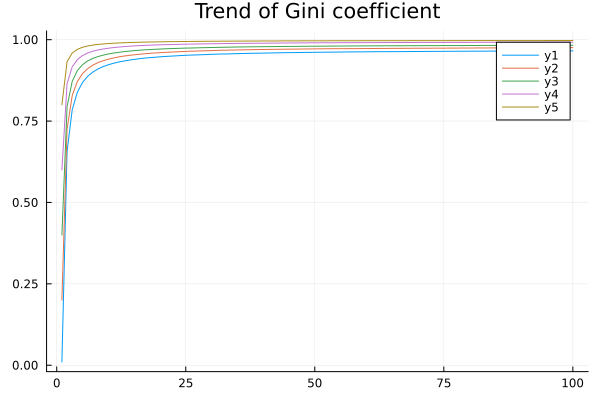

In [15]:
plot(history_collection[1][1:500:50000], title="Trend of Gini coefficient")
plot!(history_collection[2][1:500:50000])
plot!(history_collection[3][1:500:50000])
plot!(history_collection[4][1:500:50000])
plot!(history_collection[5][1:500:50000])

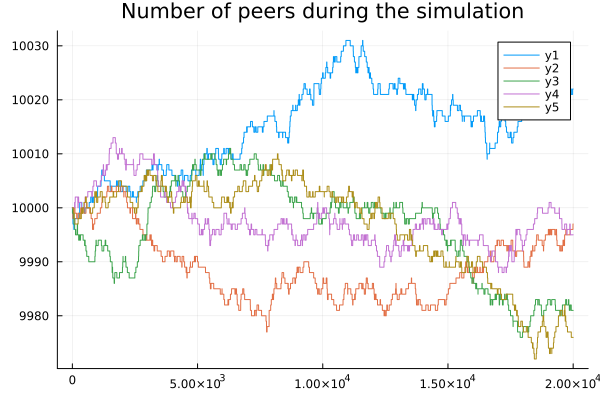

In [10]:
plot(peers_collection[1][1:10:end], title="Number of peers during the simulation")
plot!(peers_collection[2][1:10:end])
plot!(peers_collection[3][1:10:end])
plot!(peers_collection[4][1:10:end])
plot!(peers_collection[5][1:10:end])

In [11]:
using DelimitedFiles

# Export the vector to a text file
writedlm("results/e1.txt", history_collection[1][1:1000:end])
writedlm("results/e2.txt", history_collection[2][1:1000:end])
writedlm("results/e3.txt", history_collection[3][1:1000:end])
writedlm("results/e4.txt", history_collection[4][1:1000:end])
writedlm("results/e5.txt", history_collection[5][1:1000:end])